In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

%matplotlib inline
sns.set(rc={'figure.figsize': [10, 10]}, font_scale=1.2)

import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data = pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
data.dropna(inplace=True)

In [6]:
data.drop('customerID', axis=1, inplace=True)

In [7]:
# Converting Categorical columns to dummy variables
data['Churn'].replace(to_replace='Yes', value=1, inplace=True)
data['Churn'].replace(to_replace='No',  value=0, inplace=True)

In [8]:
for col in data.columns:
    print(col + '\n------')
    print(data[col].value_counts())
    print('---------------------')

gender
------
gender
Male      3555
Female    3488
Name: count, dtype: int64
---------------------
SeniorCitizen
------
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64
---------------------
Partner
------
Partner
No     3641
Yes    3402
Name: count, dtype: int64
---------------------
Dependents
------
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
---------------------
tenure
------
tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64
---------------------
PhoneService
------
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
---------------------
MultipleLines
------
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
---------------------
InternetService
------
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
---------------------
O

In [9]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [10]:
data_dummies = pd.get_dummies(data)

In [11]:
data_dummies

,SeniorCitizen,tenure,MonthlyCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,TotalCharges_995.35,TotalCharges_996.45,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9
0,0,1,29.85,0,True,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
1,0,34,56.95,0,False,True,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,0,2,53.85,1,False,True,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,0,45,42.30,0,False,True,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,0,2,70.70,1,True,False,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,0,False,True,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
7039,0,72,103.20,0,True,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
7040,0,11,29.60,0,True,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
7041,1,4,74.40,1,False,True,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False


In [12]:
Churns = pd.DataFrame(data['Churn'].value_counts()*100/len(data)).reset_index()
Churns

,Churn,count
0,0,73.463013
1,1,26.536987


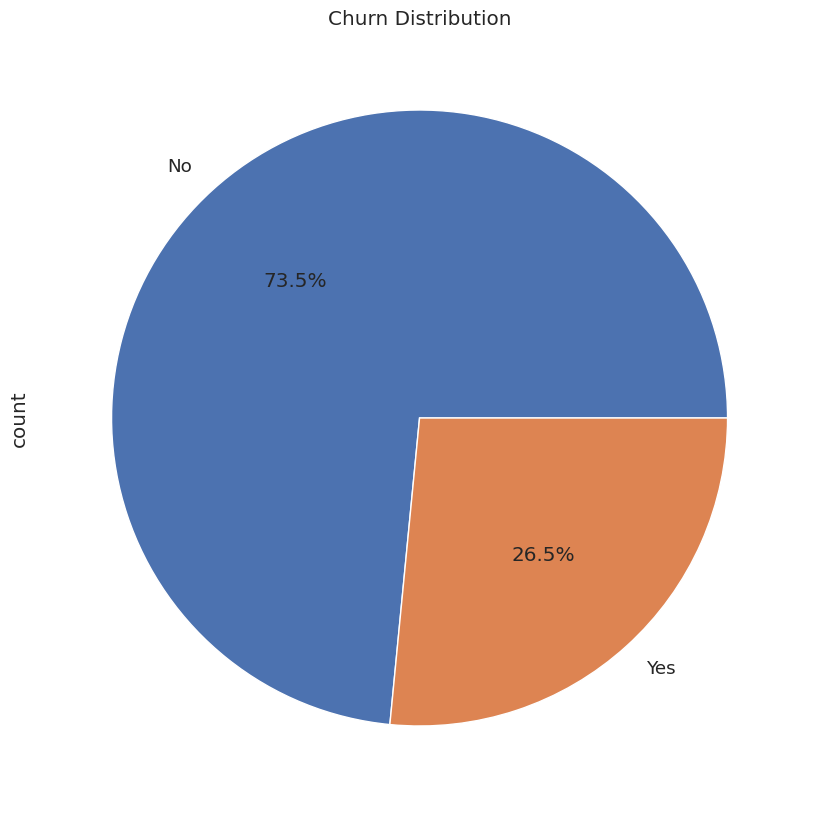

In [13]:
ax = Churns.plot(kind='pie', y='count', autopct='%1.1f%%', labels=['No', 'Yes'], legend=False, title='Churn Distribution')

In [14]:
X = data_dummies.drop('Churn', axis=1)
y = data_dummies['Churn']

In [15]:
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [17]:
y_train.value_counts()

Churn
0    3651
1    1279
Name: count, dtype: int64

In [18]:
from imblearn.over_sampling import SMOTE
print("Distribution of target variable in training set before applying SMOTE: ", y_train.value_counts(), sep='\n')
sm = SMOTE(random_state=123)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

print("\nDistribution of target variable in training set after applying SMOTE: ", y_train_sm.value_counts(), sep='\n')

Distribution of target variable in training set before applying SMOTE: 
Churn
0    3651
1    1279
Name: count, dtype: int64

Distribution of target variable in training set after applying SMOTE: 
Churn
0    3651
1    3651
Name: count, dtype: int64


In [19]:
print("Distribution of target variable in testing set before applying SMOTE: ", y_test.value_counts(), sep='\n')
sm = SMOTE(random_state=123)
X_test_sm, y_test_sm = sm.fit_resample(X_test, y_test)

print("\nDistribution of target variable in testing set after applying SMOTE: ", y_test_sm.value_counts(), sep='\n')

Distribution of target variable in testing set before applying SMOTE: 
Churn
0    1523
1     590
Name: count, dtype: int64

Distribution of target variable in testing set after applying SMOTE: 
Churn
0    1523
1    1523
Name: count, dtype: int64


In [20]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV
# Import RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
#Import Kfold
from sklearn.model_selection import KFold, StratifiedKFold
#import SMOTE
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier


**1. Logistic Regression**

**Training on Imbalanced Training Data and Testing on Imbalanced Testing Data**

In [21]:
log_reg = LogisticRegression()
result = log_reg.fit(X_train, y_train)
y_preds = log_reg.predict(X_test)
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1523
           1       0.67      0.54      0.60       590

    accuracy                           0.80      2113
   macro avg       0.75      0.72      0.73      2113
weighted avg       0.79      0.80      0.79      2113



**Training on Balanced Training Data and Testing on Balanced Testing Data**

In [22]:
log_reg = LogisticRegression()
result = log_reg.fit(X_train_sm, y_train_sm)
y_preds = log_reg.predict(X_test_sm)
print(classification_report(y_test_sm, y_preds))

              precision    recall  f1-score   support

           0       0.76      0.78      0.77      1523
           1       0.78      0.75      0.76      1523

    accuracy                           0.77      3046
   macro avg       0.77      0.77      0.77      3046
weighted avg       0.77      0.77      0.77      3046



In [24]:
# Tuning Hyperparameters of XGB with SMOTE
xgb = XGBClassifier()

param_grid = {
            'n_estimators': [100],
            'max_depth': [5],
            'learning_rate': [0.05 ]
            }
xgb_cv = GridSearchCV(xgb, param_grid, cv=3, scoring = 'recall', n_jobs=-1, verbose=1)
xgb_cv.fit(X_train_sm, y_train_sm)
print("Tuned XGB Parameters: {}".format(xgb_cv.best_params_))
print("Best score is {}\n\n".format(xgb_cv.best_score_))

Fitting 3 folds for each of 1 candidates, totalling 3 fits


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Tuned XGB Parameters: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100}
Best score is 0.8312791016159956




In [26]:
y_preds = xgb_cv.best_estimator_.predict(X_test_sm)
print(classification_report(y_test_sm, y_preds))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83      1523
           1       0.83      0.84      0.84      1523

    accuracy                           0.83      3046
   macro avg       0.83      0.83      0.83      3046
weighted avg       0.83      0.83      0.83      3046

